## Introduction to Neural Networks with PyTorch

Neural networks are nonlinear models that consist of a composition of linear and nonlinear functions. They are used to model complex relationships between inputs and outputs or to find patterns in data. In this notebook, we will introduce the basic concepts of neural networks and how to implement them using PyTorch.

A linear model with multiple inputs $\mathbf x = (x_1, x_2, \ldots, x_n)$ and multiple outputs $\mathbf y = (y_1, y_2, \ldots, y_m)$ can be written as:

$$
\mathbf y = \mathbf W \mathbf x + \mathbf b,
$$

or $y_i = \sum_{j=1}^n W_{ij} x_j + b_i$, where $W_{ij}$ are the weights and $b_i$ are the biases of the model. The weights and biases are learned from data using an optimization algorithm such as gradient descent.

If the model is nonlinear (e.g. logistic regression), the model can be written as:

$$
\mathbf y = f(\mathbf W \mathbf x + \mathbf b),
$$

where $f$ is a nonlinear function called the activation function. In the case of logistic regression in the context of multi-class classification, $f$ is the Softmax function. The activation function is applied element-wise to the output of the linear model.

Given an input vector $\mathbf{x}$, a neural network computes the output $\mathbf{y}$ as follows:

$$
\mathbf{y} = f(\mathbf{W}_L f(\mathbf{W}_{L-1} f(\ldots f(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) \ldots) + \mathbf{b}_{L-1}) + \mathbf{b}_L)
$$

where $\mathbf{W}_i$ and $\mathbf{b}_i$ are the weights and biases of the $i$-th layer, and $f$ is a nonlinear function called the activation function. The number of layers and the number of neurons in each layer are hyperparameters of the model.

One can rewrite the above equation as a composition of linear and nonlinear functions as follows (assuming the biases are absorbed into the weights):

$$
\mathbf{y} = f_L \circ \mathbf W_L \circ f_{L-1} \circ \mathbf W_{L-1} \circ \ldots \circ f_1 \circ \mathbf W_1 (\mathbf{x})
$$

In other words, deep networks (i.e. networks with many layers) are a composition of linear and nonlinear functions.


## PyTorch

PyTorch is a popular open-source machine learning library for Python. It is widely used for deep learning and is known for its flexibility and ease of use. PyTorch provides a set of tools for building and training neural networks. In this notebook, we will use PyTorch to implement a simple neural network for binary classification.

For a complete introduction to PyTorch, it's always best to refer back to the original [PyTorch Tutorials](https://pytorch.org/tutorials/).

PyTorch is essentially a library for computation using tensors, which are similar to NumPy arrays. However, PyTorch tensors can be used on a GPU to accelerate computing. PyTorch also provides a set of tools for automatic differentiation, which is essential for training neural networks.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


Let's first generate some synthetic data to illustrate the concepts. The input data is a one-dimensional vector between -3 and 3, and the output data is also one-dimensional with known map: $\sin(\cos(x^2))$.

In [2]:
# Generate synthetic data
x = torch.unsqueeze(torch.linspace(-3, 3, 1000), dim=1)  # x data (tensor), shape=(1000, 1)
y = torch.sin(torch.cos(x.pow(2))) + 0.1 * torch.randn(x.size())  # noisy y data (tensor), shape=(1000, 1)

One generated, we will create our first neural network as follows:

In [60]:

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20)  # Input layer to hidden layer
        self.fc2 = nn.Linear(20, 15)  # Hidden layer to output layer
        self.fc3 = nn.Linear(15, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


The next step is to define a the loss function we want to minimize, the optimizer (e.g. stochastic gradient descent), and the training loop. 

In [61]:

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
# optimizer = optim.SGD(net.parameters(), lr=0.05)

# Train the network
epochs = 5000
loss_list = []
for epoch in range(epochs):
    
    output = net(x)  # input x and predict based on x
    loss = criterion(output, y)  # calculate loss
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients
    optimizer.zero_grad()  # clear gradients for next train

    if epoch % 100 == 0:
        l = loss.item()
        print(f'Epoch [{epoch}/{epochs}], Loss: {l}')
        loss_list.append(l)


Epoch [0/20000], Loss: 0.41912657022476196
Epoch [100/20000], Loss: 0.14280371367931366
Epoch [200/20000], Loss: 0.11963829398155212
Epoch [300/20000], Loss: 0.08307942748069763
Epoch [400/20000], Loss: 0.039725162088871
Epoch [500/20000], Loss: 0.01513218879699707
Epoch [600/20000], Loss: 0.012770246714353561
Epoch [700/20000], Loss: 0.014739656820893288
Epoch [800/20000], Loss: 0.011582354083657265
Epoch [900/20000], Loss: 0.011630788445472717
Epoch [1000/20000], Loss: 0.013034353032708168
Epoch [1100/20000], Loss: 0.011521777138113976
Epoch [1200/20000], Loss: 0.011487428098917007
Epoch [1300/20000], Loss: 0.011490545235574245
Epoch [1400/20000], Loss: 0.011496572755277157
Epoch [1500/20000], Loss: 0.01144243311136961
Epoch [1600/20000], Loss: 0.01142533216625452
Epoch [1700/20000], Loss: 0.01716855727136135
Epoch [1800/20000], Loss: 0.012829232960939407
Epoch [1900/20000], Loss: 0.011384370736777782
Epoch [2000/20000], Loss: 0.01137556228786707
Epoch [2100/20000], Loss: 0.011474491

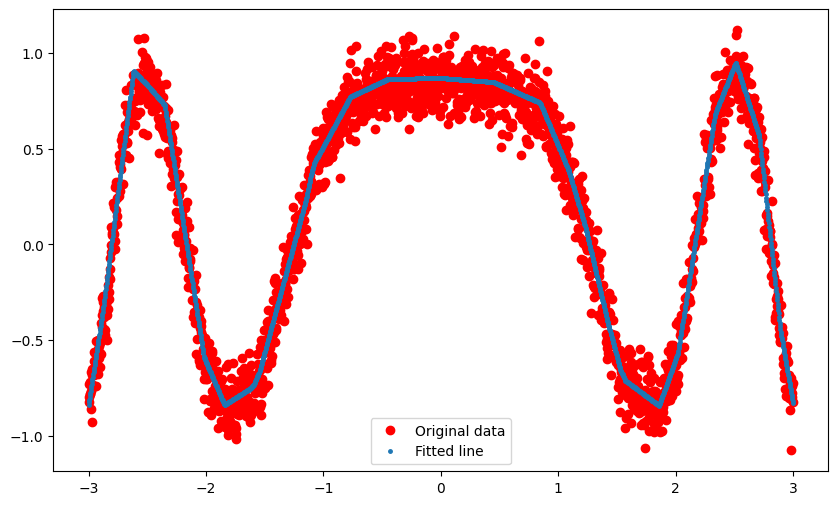

In [63]:

# Plot the results
predicted = net(x).data.numpy()

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(x.numpy(), predicted, '.', ms=5, label='Fitted line')
plt.legend()
plt.show()


### Split data in terms of test and training sets
To make things in a little more general, we will split the data into test and training sets (a functionality pytorch provides). And we will define a training loop.

In [64]:
# Split the data into training and test sets
train_size = int(0.8 * len(x))
test_size = len(x) - train_size
x_train, x_test = torch.split(x, [train_size, test_size])
y_train, y_test = torch.split(y, [train_size, test_size])

# Define a simple neural network
net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Test function
def evaluate(net, x):
    net.eval()  # Set the network to evaluation mode
    with torch.no_grad():  # Gradient computation is not needed for inference
        predictions = net(x)
    return predictions

# Training function
def train(net, criterion, optimizer, x_train, y_train, epochs):
    eval_loss_list = []
    train_loss_list = []
    for epoch in range(epochs):
        output = net(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Logging
        eval_loss = criterion(evaluate(net, x_test), y_test)
        eval_loss_list.append(eval_loss.item())
        train_loss_list.append(loss.item())

        # Print
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item()}, Eval Loss: {eval_loss.item()}')

    
    return eval_loss_list, train_loss_list


# Train the network
eval_loss_list, train_loss_list = train(net, criterion, optimizer, x_train, y_train, epochs=epochs)

# Test the network
predictions = evaluate(net, x_test)
predictions_train = evaluate(net, x_train)



Epoch [0/20000], Loss: 0.5395350456237793, Eval Loss: 0.3864257335662842
Epoch [100/20000], Loss: 0.08504823595285416, Eval Loss: 4.209470748901367
Epoch [200/20000], Loss: 0.03844190016388893, Eval Loss: 4.0536909103393555
Epoch [300/20000], Loss: 0.016203980892896652, Eval Loss: 3.4346954822540283
Epoch [400/20000], Loss: 0.012500549666583538, Eval Loss: 3.2388906478881836
Epoch [500/20000], Loss: 0.011567395180463791, Eval Loss: 3.0611932277679443
Epoch [600/20000], Loss: 0.01121881976723671, Eval Loss: 2.950810432434082
Epoch [700/20000], Loss: 0.011551052331924438, Eval Loss: 2.8685355186462402
Epoch [800/20000], Loss: 0.012086404487490654, Eval Loss: 2.7351365089416504
Epoch [900/20000], Loss: 0.010830305516719818, Eval Loss: 2.669358015060425
Epoch [1000/20000], Loss: 0.010772398672997952, Eval Loss: 2.595892906188965
Epoch [1100/20000], Loss: 0.017358427867293358, Eval Loss: 2.585994243621826
Epoch [1200/20000], Loss: 0.0111027667298913, Eval Loss: 2.4026787281036377
Epoch [130

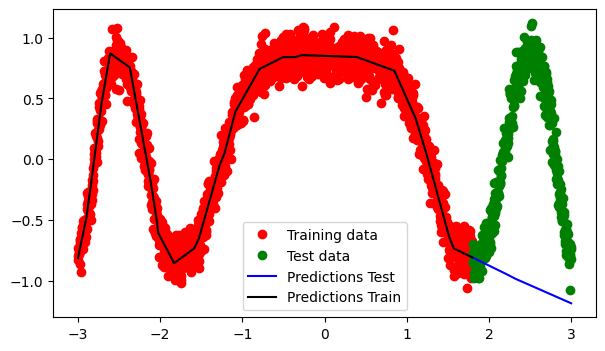

In [65]:
# Plot training data, test data, and the model prediction
plt.figure(figsize=(7, 4))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'ro', label='Training data')
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'go', label='Test data')
plt.plot(x_test.data.numpy(), predictions.data.numpy(), 'b-', label='Predictions Test')
plt.plot(x_train.data.numpy(), predictions_train.data.numpy(), 'k-', label='Predictions Train')
plt.legend()
plt.show()

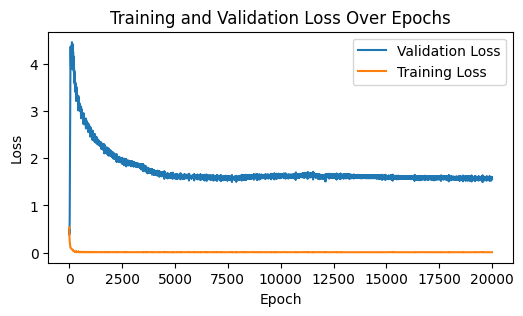

In [66]:
# Plotting the training and validation losses
# %matplotlib widget
plt.figure(figsize=(6, 3))
plt.plot(eval_loss_list, label='Validation Loss')
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

One way to prevent overfitting is to add a regularization term. In Pytorch, that's as simple as adding a weight_decay argument to the optimizer.

Epoch [0/20000], Loss: 0.6357275247573853, Eval Loss: 0.5332711935043335
Epoch [100/20000], Loss: 0.09781152755022049, Eval Loss: 2.7470149993896484
Epoch [200/20000], Loss: 0.09753874689340591, Eval Loss: 2.461693525314331
Epoch [300/20000], Loss: 0.09700100868940353, Eval Loss: 2.0969321727752686
Epoch [400/20000], Loss: 0.09689640253782272, Eval Loss: 1.8611756563186646
Epoch [500/20000], Loss: 0.09689412266016006, Eval Loss: 1.8200654983520508
Epoch [600/20000], Loss: 0.09687962383031845, Eval Loss: 1.7754356861114502
Epoch [700/20000], Loss: 0.09687324613332748, Eval Loss: 1.7459039688110352
Epoch [800/20000], Loss: 0.014662301167845726, Eval Loss: 1.389796257019043
Epoch [900/20000], Loss: 0.012049637734889984, Eval Loss: 1.9136090278625488
Epoch [1000/20000], Loss: 0.012260636314749718, Eval Loss: 2.0129406452178955
Epoch [1100/20000], Loss: 0.012147133238613605, Eval Loss: 2.040855884552002
Epoch [1200/20000], Loss: 0.012026889249682426, Eval Loss: 2.0211570262908936
Epoch [130

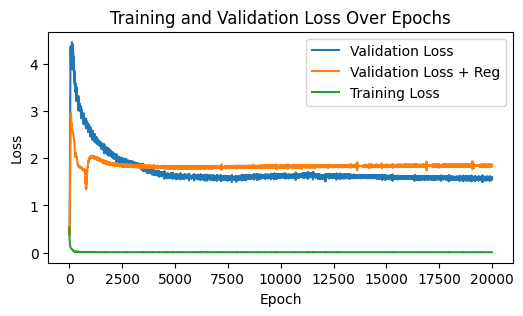

In [67]:
net_reg = Net()

optimizer = optim.Adam(net_reg.parameters(), lr=0.01, weight_decay=1e-3)
criterion = nn.MSELoss()

# Train the network
eval_loss_list_reg, train_loss_list_reg = train(net_reg, criterion, optimizer, x_train, y_train, epochs=epochs)

# %matplotlib widget
plt.figure(figsize=(6, 3))
plt.plot(eval_loss_list, label='Validation Loss')
plt.plot(eval_loss_list_reg, label='Validation Loss + Reg')
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


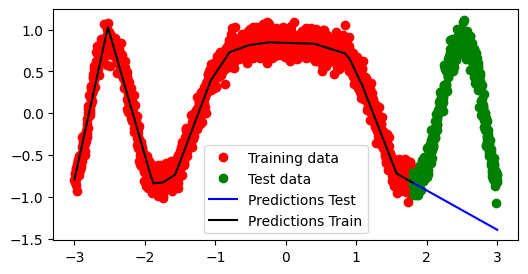

In [68]:
predictions_test_reg = evaluate(net_reg, x_test)
predictions_train_reg = evaluate(net_reg, x_train)

# Plot training data, test data, and the model prediction
plt.figure(figsize=(6, 3))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'ro', label='Training data')
plt.plot(x_test.data.numpy(), y_test.data.numpy(), 'go', label='Test data')
plt.plot(x_test.data.numpy(), predictions_test_reg.data.numpy(), 'b-', label='Predictions Test')
plt.plot(x_train.data.numpy(), predictions_train_reg.data.numpy(), 'k-', label='Predictions Train')
plt.legend()


## Dataloaders, training and validation loops

Finally, let's add a validation loop to our training loop. We will use the validation set to evaluate the model's performance and to prevent overfitting. We will also use PyTorch's DataLoader to load the data in batches and to shuffle the data to facilitate batch gradient descent.

In [69]:
from torch.utils.data import TensorDataset, DataLoader

# Generate synthetic data
x = torch.unsqueeze(torch.linspace(-3, 3, 2000), dim=1)
y = torch.sin(torch.cos(x.pow(2))) + 0.1 * torch.randn(x.size())

# Split the data into training and test sets and create DataLoaders
train_size = int(0.8 * len(x))
test_size = len(x) - train_size
x_train, x_test = torch.split(x, [train_size, test_size])
y_train, y_test = torch.split(y, [train_size, test_size])

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [71]:
train_loader

In [72]:

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

# Train step function
def train_step(model, criterion, optimizer, x, y):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Validation step function
def validation_step(model, criterion, x, y):
    model.eval()
    with torch.no_grad():
        output = model(x)
        loss = criterion(output, y)
    return loss.item()

# Training and evaluation loop with loss tracking
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        train_loss = 0.0
        for x_batch, y_batch in train_loader:
            train_loss += train_step(model, criterion, optimizer, x_batch, y_batch)
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = 0.0
        for x_batch, y_batch in test_loader:
            val_loss += validation_step(model, criterion, x_batch, y_batch)
        val_loss /= len(test_loader)
        val_losses.append(val_loss)

        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}] Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Run the training and evaluation
train_losses, val_losses = train_and_evaluate(net, criterion, optimizer, train_loader, test_loader, epochs=2000)



Epoch [0/2000] Train Loss: 0.3821, Validation Loss: 0.4095
Epoch [100/2000] Train Loss: 0.0660, Validation Loss: 4.3898
Epoch [200/2000] Train Loss: 0.0368, Validation Loss: 3.5511
Epoch [300/2000] Train Loss: 0.0204, Validation Loss: 2.5461
Epoch [400/2000] Train Loss: 0.0137, Validation Loss: 2.2915
Epoch [500/2000] Train Loss: 0.0115, Validation Loss: 2.2926
Epoch [600/2000] Train Loss: 0.0109, Validation Loss: 2.3541
Epoch [700/2000] Train Loss: 0.0107, Validation Loss: 2.1861
Epoch [800/2000] Train Loss: 0.0109, Validation Loss: 2.2579
Epoch [900/2000] Train Loss: 0.0108, Validation Loss: 2.1711
Epoch [1000/2000] Train Loss: 0.0107, Validation Loss: 2.0881
Epoch [1100/2000] Train Loss: 0.0107, Validation Loss: 2.2374
Epoch [1200/2000] Train Loss: 0.0107, Validation Loss: 2.0560
Epoch [1300/2000] Train Loss: 0.0106, Validation Loss: 2.2619
Epoch [1400/2000] Train Loss: 0.0109, Validation Loss: 2.0449
Epoch [1500/2000] Train Loss: 0.0106, Validation Loss: 2.1157
Epoch [1600/2000] Tr

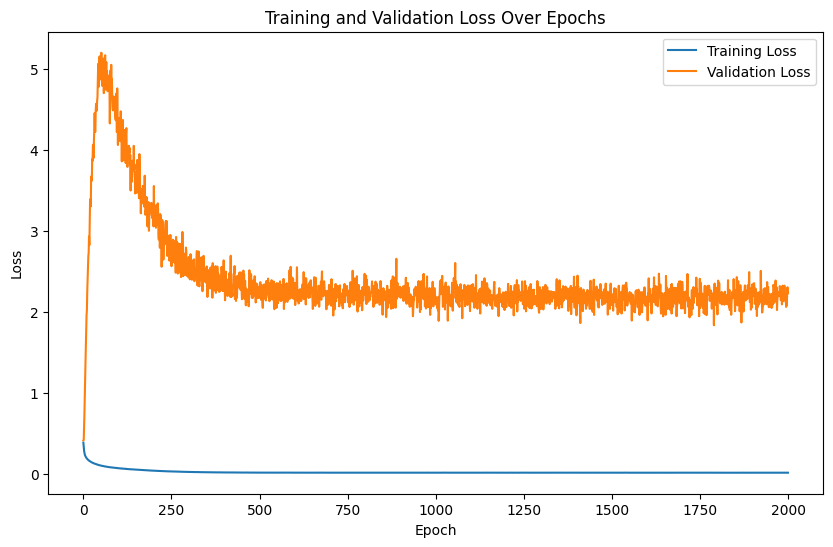

In [73]:
# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


/var/folders/wq/rd7c2mhn7fs9y313qjs3c58r0000gn/T/ipykernel_56098/523898071.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32)


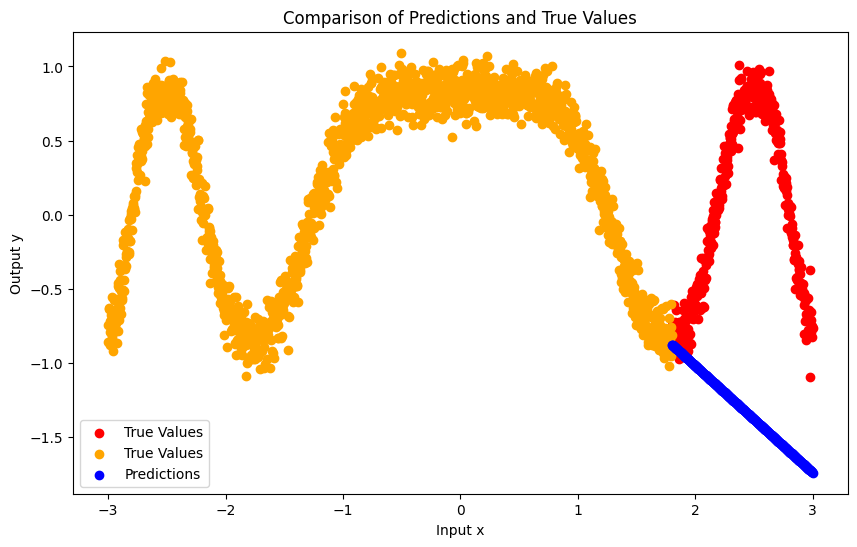

In [74]:
# After training
net.eval()
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
predictions = net(x_test_tensor).detach().numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='red', label='True Values')
plt.scatter(x_train, y_train, color='orange', label='True Values')
plt.scatter(x_test, predictions, color='blue', label='Predictions')
plt.title('Comparison of Predictions and True Values')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()
plt.show()

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Generate synthetic data
x = torch.unsqueeze(torch.linspace(-3, 3, 2000), dim=1)
y = torch.sin(torch.cos(x.pow(2))) + 0.1 * torch.randn(x.size())

# Split the data into training and test sets and create DataLoaders
train_size = int(0.8 * len(x))
test_size = len(x) - train_size
x_train, x_test = torch.split(x, [train_size, test_size])
y_train, y_test = torch.split(y, [train_size, test_size])

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)

class SymmetricNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, output_size):
        super(SymmetricNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        self.fc2 = nn.Linear(hidden_size, hidden_size2, bias=False)
        self.fc3 = nn.Linear(hidden_size2, output_size, bias=False)

    def forward(self, x):
        x = torch.cos(x)
        x = F.elu(self.fc1(x))
        x = F.elu(self.fc2(x))
        x = self.fc3(x)
        # x = torch.cos(self.fc3(x))
        return x

symnet = SymmetricNet(input_size=1, hidden_size=20, hidden_size2=15, output_size=1)

# Set the hyperparameters
learning_rate = 0.003
num_epochs = 5000

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(symnet.parameters(), lr=learning_rate, weight_decay=1e-5)

# Run the training and evaluation
train_losses, val_losses = train_and_evaluate(symnet, criterion, optimizer, train_loader, test_loader, epochs=num_epochs)


Epoch [0/5000] Train Loss: 0.3451, Validation Loss: 0.6773
Epoch [100/5000] Train Loss: 0.1855, Validation Loss: 0.4188
Epoch [200/5000] Train Loss: 0.1848, Validation Loss: 0.4232
Epoch [300/5000] Train Loss: 0.1848, Validation Loss: 0.4265
Epoch [400/5000] Train Loss: 0.1851, Validation Loss: 0.4113
Epoch [500/5000] Train Loss: 0.1843, Validation Loss: 0.4135
Epoch [600/5000] Train Loss: 0.1838, Validation Loss: 0.4120
Epoch [700/5000] Train Loss: 0.1837, Validation Loss: 0.4135
Epoch [800/5000] Train Loss: 0.1828, Validation Loss: 0.4056
Epoch [900/5000] Train Loss: 0.1837, Validation Loss: 0.4036
Epoch [1000/5000] Train Loss: 0.1626, Validation Loss: 0.3804
Epoch [1100/5000] Train Loss: 0.1074, Validation Loss: 0.2064
Epoch [1200/5000] Train Loss: 0.0613, Validation Loss: 0.0715
Epoch [1300/5000] Train Loss: 0.0434, Validation Loss: 0.0293
Epoch [1400/5000] Train Loss: 0.0357, Validation Loss: 0.0269
Epoch [1500/5000] Train Loss: 0.0309, Validation Loss: 0.0376
Epoch [1600/5000] Tr

/var/folders/wq/rd7c2mhn7fs9y313qjs3c58r0000gn/T/ipykernel_56098/1837863936.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
/var/folders/wq/rd7c2mhn7fs9y313qjs3c58r0000gn/T/ipykernel_56098/1837863936.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train, dtype=torch.float32)


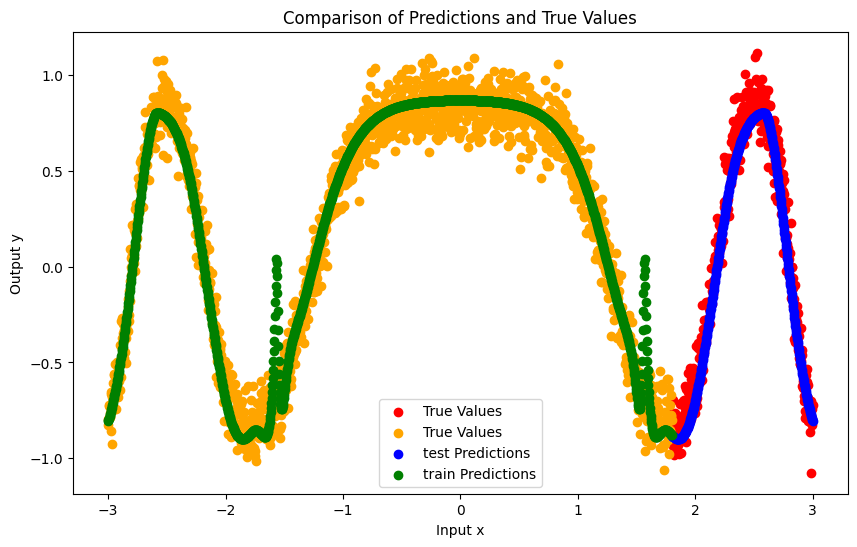

In [47]:
symnet.eval()
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
predictions_test = symnet(x_test_tensor).detach().numpy()
predictions_train = symnet(x_train_tensor).detach().numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='red', label='True Values')
plt.scatter(x_train, y_train, color='orange', label='True Values')
plt.scatter(x_test, predictions_test, color='blue', label='test Predictions')
plt.scatter(x_train, predictions_train, color='green', label='train Predictions')
plt.title('Comparison of Predictions and True Values')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()
plt.show()